SEMNINAR 1.

## Algoritam k-sredina - implementacija

In [452]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import cv2

warnings.filterwarnings("ignore")

Nasumično odabiranje podataka

In [453]:
# generiranje nasumičnih podataka u obliku 2d točke
n = 100
random_points = np.random.randint(0,n,(n,2))


In [454]:
# računanje granica za centroide
max_x = np.max(random_points[:, 0])
min_x = np.min(random_points[:, 0])
max_y = np.max(random_points[:, 1])
min_y = np.min(random_points[:, 1])
random_centroids= np.random.uniform(low=[min_x, min_y], high=[max_x, max_y], size=(10, 2))


In [455]:
# računanje distance između točaka
def euc_dist(p1,p2):
    return np.sum(np.square(p1 - p2))

# raspoređivanje točaka u clustere
def min_length(k, points, centroids):
    categories = np.zeros(len(points))
    for i in range(len(points)): #points
        distances = np.zeros(k)
        for j in range(k): #centroids
            distances[j] = euc_dist(points[i],centroids[j])
        if j == k-1:
            # odaberemo minimalnu distancu između trenutne točke i svih centroida
            min_dist = np.min(distances)
            # odredimo kojem cluseru pripada
            categories[i] = np.where(distances == min_dist)[0]
    return categories

# ažuriranje centroida ovisno o srednjoj vrijednosti svih točaka clustera
def new_centroids(k, points,centroids):
    categories = min_length(k, points,centroids)
    means_per_category = []
    for cat in np.unique(categories):
        category_points = points[categories == cat]
        mean_coordinates = np.mean(category_points, axis=0)
        means_per_category.append((cat, mean_coordinates))
    return np.array([item[1] for item in means_per_category])

#funkcija potrebna za metodu lakta
def sse(k, points, centroids):
    #suma udaljenosti 
    categories = min_length(k, points, centroids)
    sse = 0
    for i in range(len(points)):
        cluster_center = centroids[int(categories[i])]
        sse += (euc_dist(points[i], cluster_center))**2
    
    return sse


Početno stanje grafova sa nasumično odabranim točkama i nasumično odabranim centroidima sa k iz [2,11]

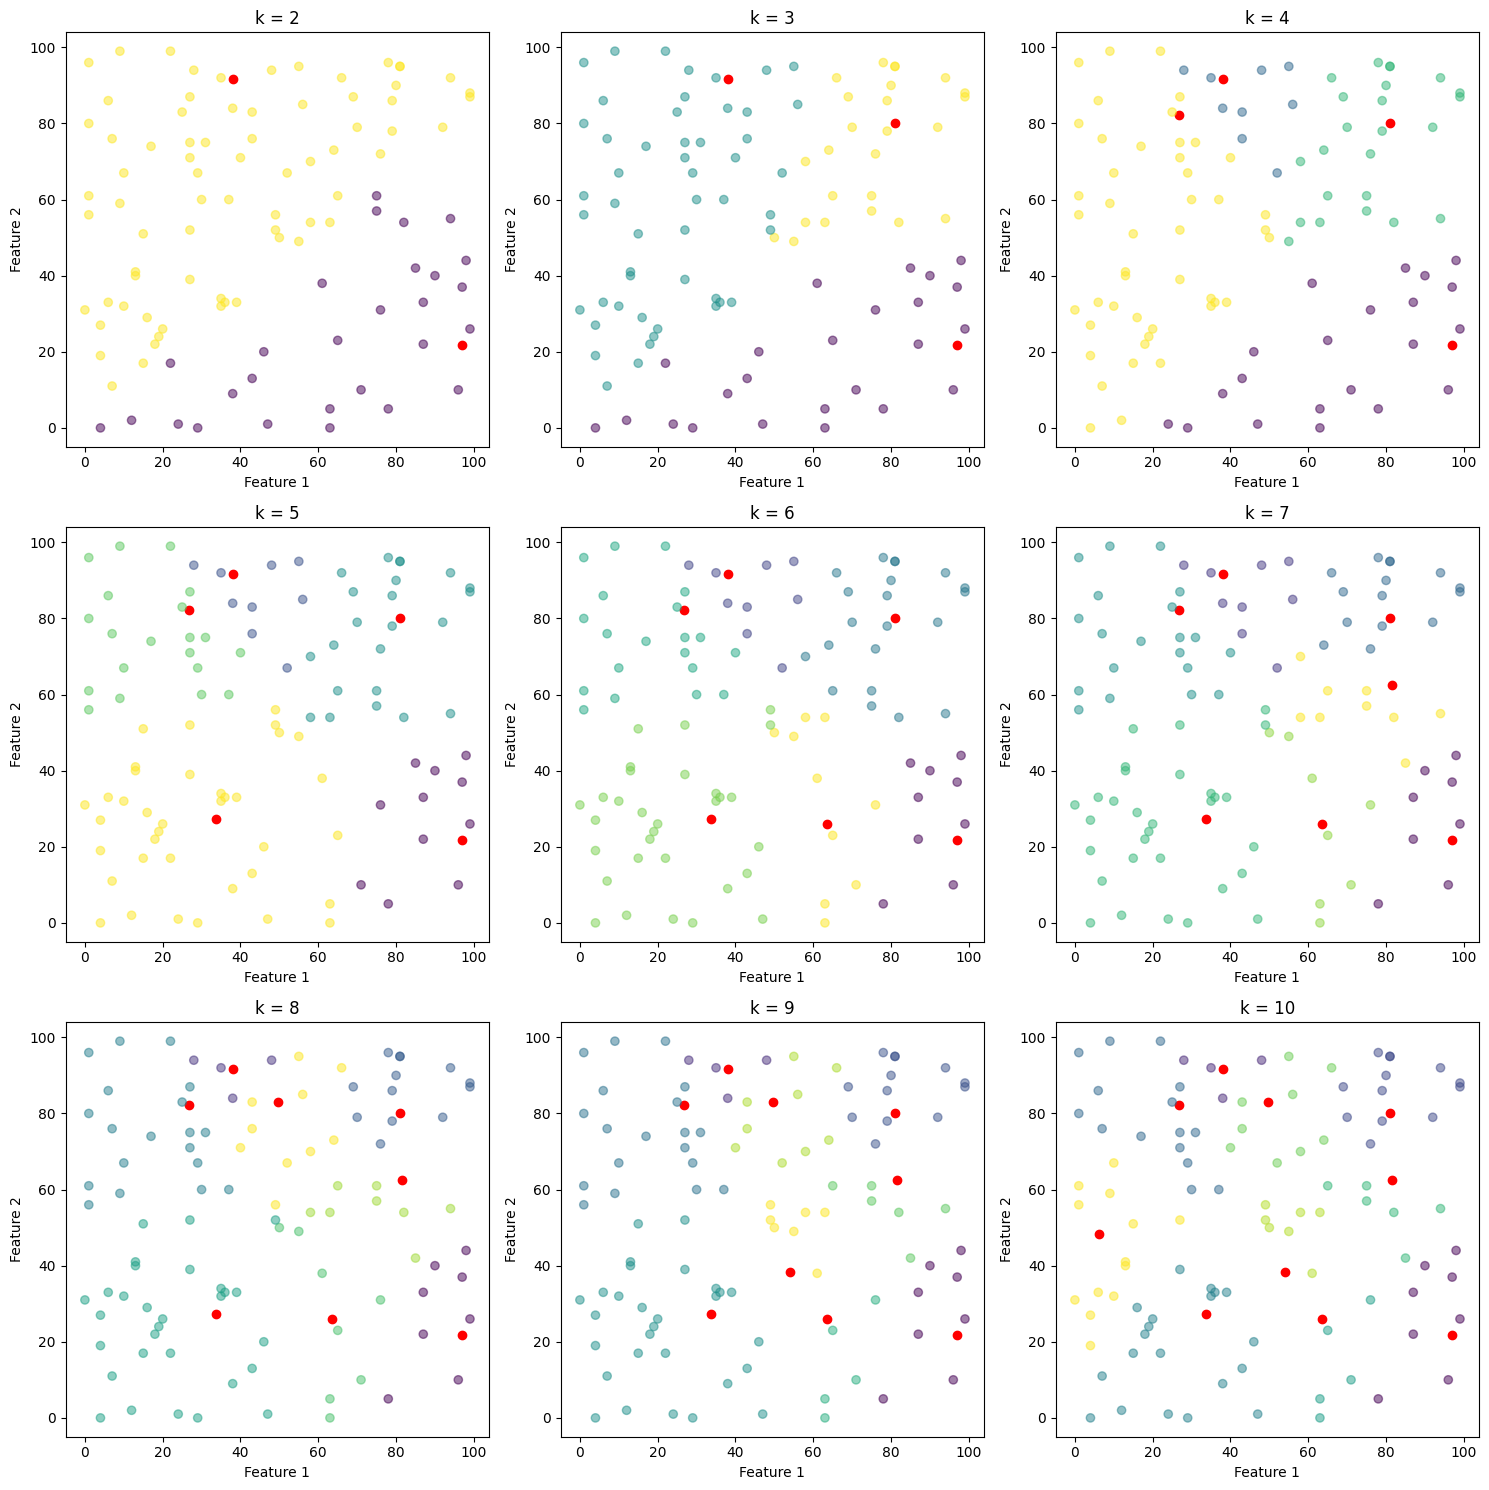

In [456]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, k in enumerate(range(2, 11)):
    centroids = random_centroids[:k, :]

    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red')

    cluster_assignments = min_length(k, random_points, centroids)
    axes[i].scatter(random_points[:, 0], random_points[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)

    axes[i].set_title(f'k = {k}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

Grafovi nakon n iteracija i pomicanja centroida za k iz [2,11]

In [457]:
def alg_k_sredina(k, random_points, random_centroids):
    centroids_temp = []
    
    
    for _ in range(k):
        centroids_temp.append([ 0, 0])
    num_of_iterations = 0
    all_centroids = random_centroids
    random_centroids1 = new_centroids(k,random_points,random_centroids)
    while not np.array_equal(centroids_temp, all_centroids[-k:]):
        centroids_temp = all_centroids[-k:]
        random_centroids1 = new_centroids(k,random_points,random_centroids1)
        all_centroids = np.concatenate((all_centroids, random_centroids1), axis=0)
        num_of_iterations = num_of_iterations + 1
    
    
    return random_centroids1, all_centroids, num_of_iterations
   



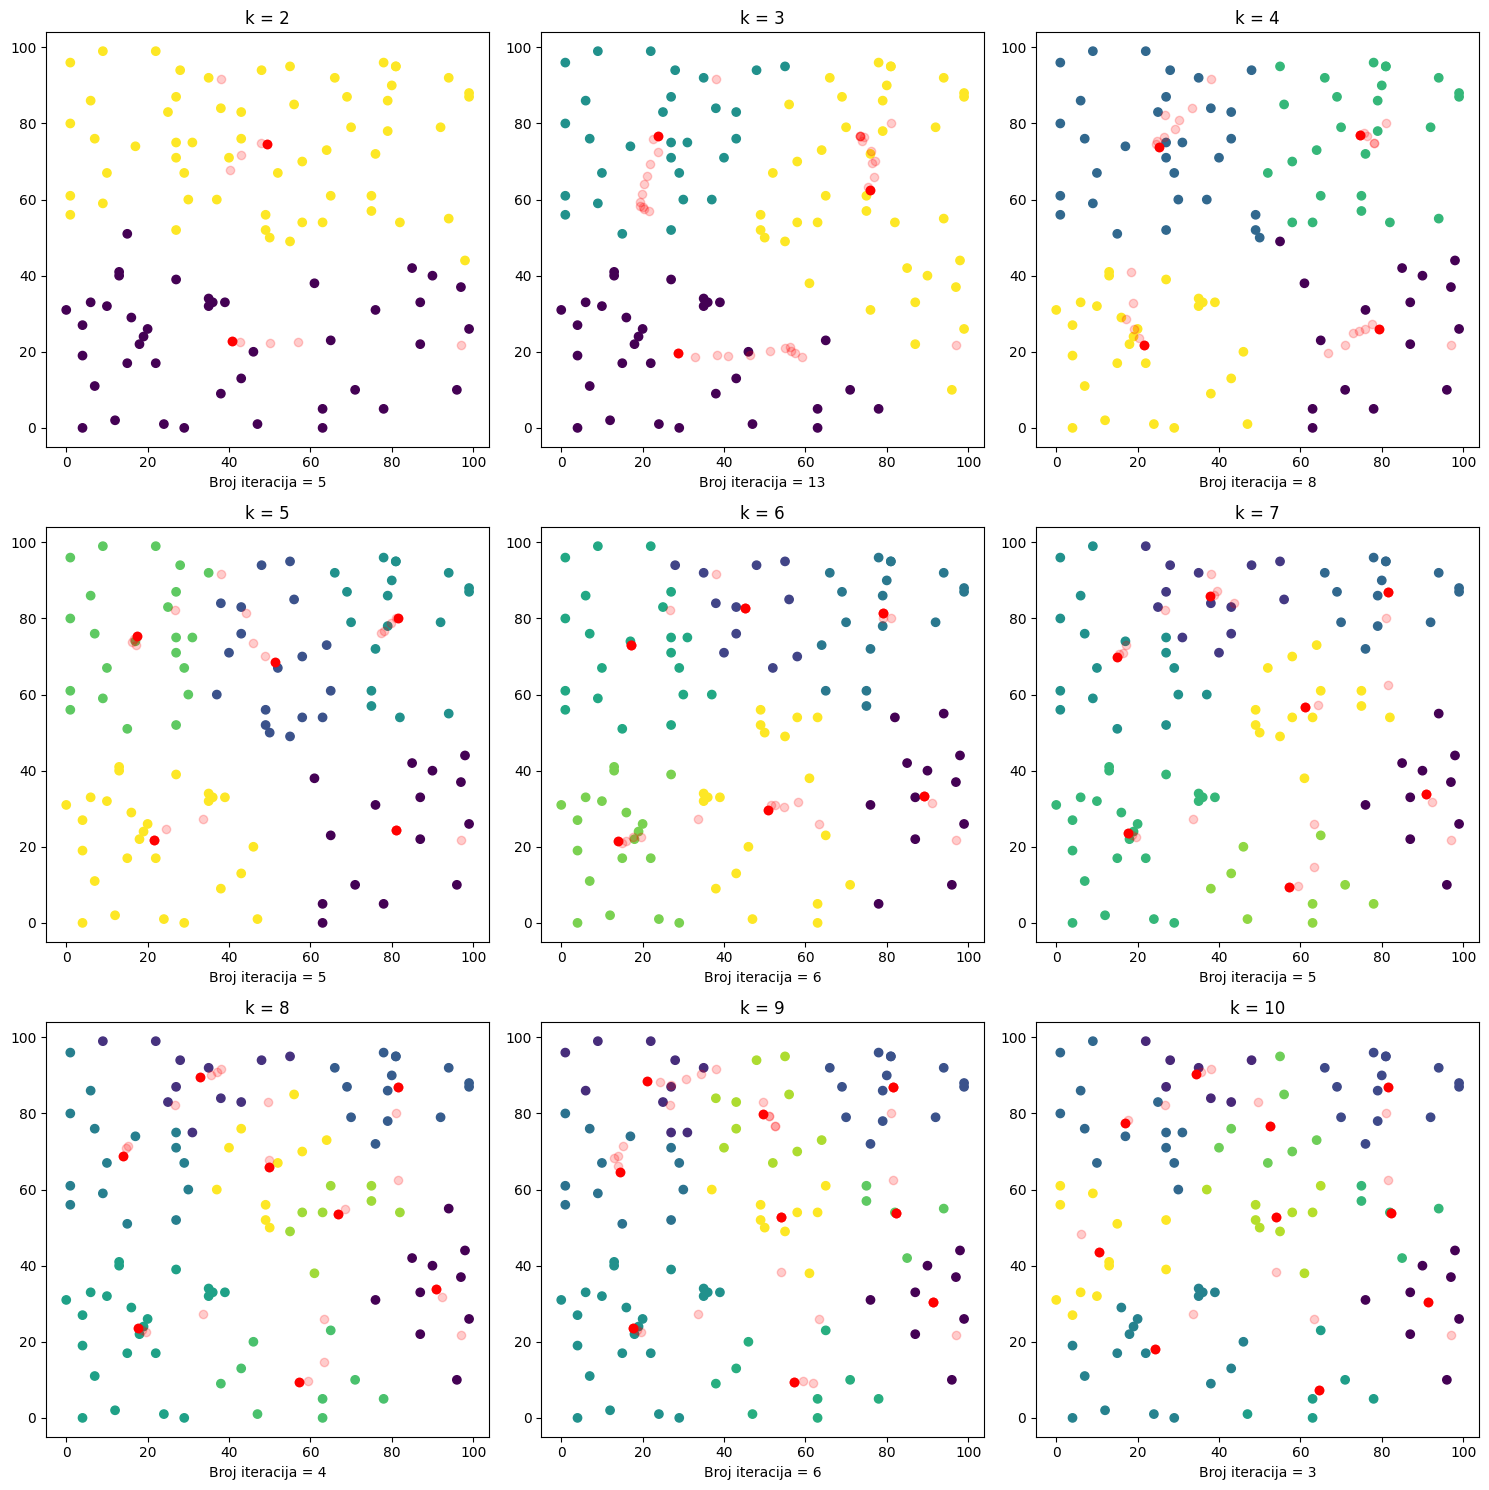

In [458]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, k in enumerate(range(2, 11)):
    random_centroids1, all_centroids1, num_of_iterations = alg_k_sredina(k, random_points, random_centroids[:k])
    
    centroids = random_centroids1[:k, :]

    axes[i].scatter(random_points[:, 0], random_points[:, 1], c=min_length(k, random_points, centroids), cmap='viridis') 
    axes[i].scatter(all_centroids1[:,0], all_centroids1[:,1], c='red', alpha=0.2)
    axes[i].scatter(centroids[:,0], centroids[:,1], c='red')

    axes[i].set_title(f'k = {k}')
    axes[i].set_xlabel(f'Broj iteracija = {num_of_iterations}')


plt.tight_layout()
plt.show()

Odabir k metodom lakta

2


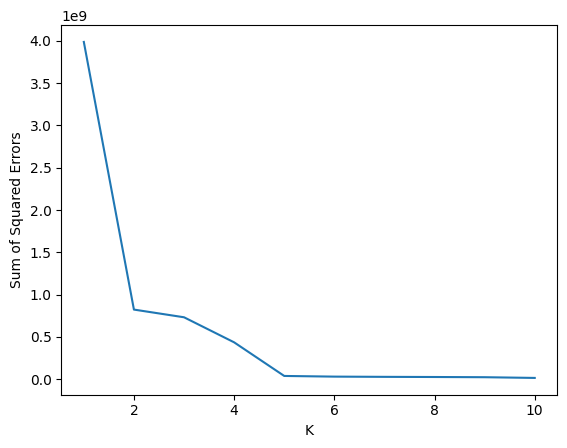

In [459]:
def elbow_method(random_points, random_centroids):
    ks = []
    sse_list = []
    # proširivanje liste središta za metodu lakta
    random_centroids_sse = random_centroids.copy()
    # metoda lakta
    for k2 in range(1,11):
        ks.append(k2)
        sse_list.append(sse(k2, random_points, random_centroids_sse[:k2]))
    plt.plot(ks, sse_list)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")


    # optimalni k je točka kada dolazi do smanjenja brzine smanjivanja
    # točka u "laktu"
    elbow_candidate = []
    for s in range(len(sse_list)):
        if (s > 2):
            if ((abs(sse_list[s-2]-sse_list[s-1]) + abs(sse_list[s-1]-sse_list[s]) ) 
                < abs(sse_list[s-3]-sse_list[s-2])/2):
                
                elbow_candidate.append(s-1)
                
    return(min(elbow_candidate))   
    
print(elbow_method(random_points, random_centroids))
                        

Primjer sa slikom

In [460]:

#broj iteracija u algoritmu
iterations= 5

In [461]:
# ažuriranje centroida ovisno o srednjoj vrijednosti svih točaka skupina - prilagođeno za sliku
def new_centroids2(k, points,centroids):
    categories = min_length(k, points,centroids)
    means_per_category = []
    
    default_categ = []
    for i in range(k):
        default_categ.append(float(i))
    
    for cat in default_categ:
        category_points = points[categories == cat]
        mean_coordinates = np.mean(category_points, axis=0)
        means_per_category.append((cat, mean_coordinates))
    return np.array([item[1] for item in means_per_category])



optimalni k prema metodi lakta je 4


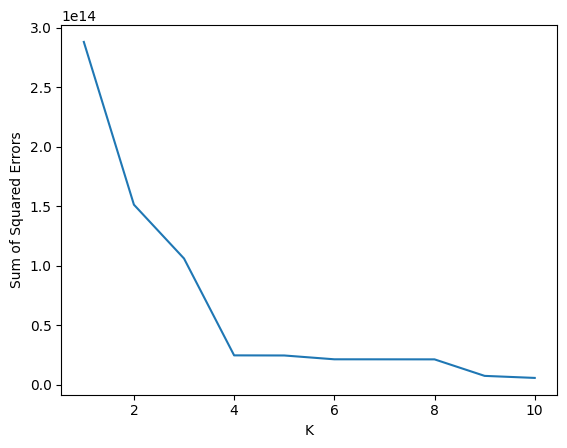

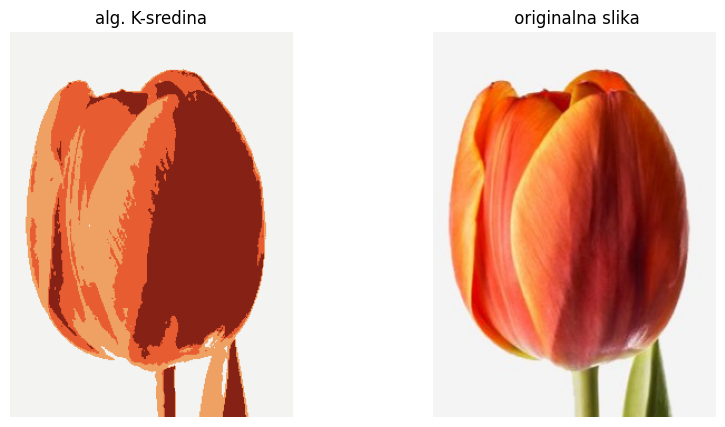

In [462]:

# učitavanje, izravnjavanje slike
image = cv2.imread('tulip2.jpg')  
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image_rgb.reshape((-1, 3))


# maksimalni k
k_max = 10

# računanje granica za centroide
max_x = np.max(pixels[:, 0])
min_x = np.min(pixels[:, 0])
max_y = np.max(pixels[:, 1])
min_y = np.min(pixels[:, 1])
max_z = np.max(pixels[:, 2])
min_z = np.min(pixels[:, 2])
random_centroids_image = np.random.uniform(low=[min_x, min_y, min_z], 
                                        high=[max_x, max_y, max_z], 
                                        size=(k_max, 3))
# optimalni k preko elbow metode
k = elbow_method(pixels,random_centroids_image)
print('optimalni k prema metodi lakta je ' + str(k))

for _ in range(iterations):
    random_centroids_image = new_centroids2(k, pixels,random_centroids_image)
categories = min_length(k, pixels, random_centroids_image)

for i in range(len(pixels)):
    pixels[i] = random_centroids_image[int(categories[i])]

# prikaz slika
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 2)
plt.imshow(image_rgb_2)
plt.axis('off')
plt.title(' originalna slika')


plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('alg. K-sredina')



plt.show()
